<a href="https://colab.research.google.com/github/sukh-coder30/Function/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
data = load_iris()



In [3]:
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['target']=data.target

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df= df[df['target']!=2]

In [7]:
x = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25,random_state=1 )

from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

In [9]:
model = classifier.fit(x_train,y_train)

In [11]:
model


LogisticRegression()

In [15]:
y_pred= classifier.predict(x_test)
classifier.predict_proba(x_test)

array([[0.04219552, 0.95780448],
       [0.01103808, 0.98896192],
       [0.98659594, 0.01340406],
       [0.0566138 , 0.9433862 ],
       [0.14130578, 0.85869422],
       [0.97894389, 0.02105611],
       [0.9814791 , 0.0185209 ],
       [0.03449751, 0.96550249],
       [0.03539877, 0.96460123],
       [0.00912419, 0.99087581],
       [0.02594531, 0.97405469],
       [0.97438783, 0.02561217],
       [0.00555209, 0.99444791],
       [0.00260007, 0.99739993],
       [0.00828234, 0.99171766],
       [0.98568223, 0.01431777],
       [0.96506557, 0.03493443],
       [0.94783611, 0.05216389],
       [0.00784167, 0.99215833],
       [0.97676114, 0.02323886],
       [0.98358927, 0.01641073],
       [0.00596944, 0.99403056],
       [0.01323807, 0.98676193],
       [0.02105427, 0.97894573],
       [0.97929985, 0.02070015]])

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 0, 15]])

In [17]:
accuracy_score(y_test, y_pred)

1.0

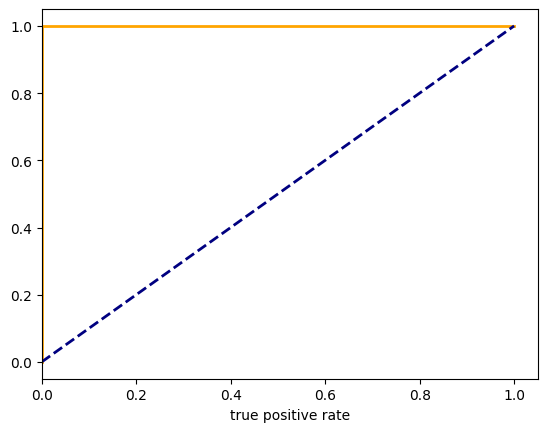

In [20]:
from sklearn.metrics import roc_curve, auc
y_pred_proba=classifier.predict_proba(x_test)[:,1]
fpr, tpr, threashold=roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.Figure(figsize=(8,6))
plt.plot(fpr, tpr, color= "orange", linewidth=2, label='Roc curve(area =%0.2f)'% roc_auc)
plt.plot([0,1],[0,1], color="navy", linewidth=2, linestyle='--')
plt.xlim(0.0, 1.0)
plt.xlim(0.0, 1.05)
plt.xlabel("False positive rate")
plt.xlabel("true positive rate")
plt.show()

2.Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracyC

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#used above dataset
# 3️⃣ Standardize Features (L1 Regularization Works Better with Scaled Data)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 4️⃣ Train Logistic Regression Model with L1 Regularization
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # 'liblinear' solver supports L1
model.fit(x_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(x_test)

# 6️⃣ Calculate and Print Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L1 Regularization: {accuracy:.4f}")

# 7️⃣ Print Feature Importance (Coefficients)
print("Feature Coefficients (Some may be exactly zero due to L1 regularization):")
print(model.coef_)

Model Accuracy with L1 Regularization: 1.0000
Feature Coefficients (Some may be exactly zero due to L1 regularization):
[[ 0.         -0.42008057  2.31148199  2.00140758]]


3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficientsC

In [26]:
# 4️⃣ Train Logistic Regression Model with L2 Regularization
model = LogisticRegression(penalty='l2', solver='lbfgs', C=1.0)  # 'lbfgs' solver supports L2
model.fit(x_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(x_test)

# 6️⃣ Calculate and Print Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with L2 Regularization: {accuracy:.4f}")

# 7️⃣ Print Feature Importance (Coefficients)
print("Feature Coefficients (Some may be exactly zero due to L2 regularization):")
print(model.coef_)

Model Accuracy with L2 Regularization: 1.0000
Feature Coefficients (Some may be exactly zero due to L2 regularization):
[[ 0.8132449  -1.02126161  1.44273308  1.47607093]]


4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

In [28]:
# 4️⃣ Train Logistic Regression Model with elasticnet Regularization
model = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5, C=1.0)  # 'saga' solver supports elasticnet
model.fit(x_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(x_test)

# 6️⃣ Calculate and Print Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with elasticnet Regularization: {accuracy:.4f}")

# 7️⃣ Print Feature Importance (Coefficients)
print("Feature Coefficients (Some may be exactly zero due to elasticnet regularization):")
print(model.coef_)

Model Accuracy with elasticnet Regularization: 1.0000
Feature Coefficients (Some may be exactly zero due to elasticnet regularization):
[[ 0.55438132 -0.91180726  1.6157354   1.6507999 ]]


5. Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'C

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass Labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Helps Logistic Regression Perform Better)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model with One-vs-Rest (OvR)
model = LogisticRegression(multi_class='ovr', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Calculate and Print Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with One-vs-Rest (OvR): {accuracy:.4f}")

# 7️⃣ Print Class-wise Coefficients
print("\nFeature Coefficients for Each Class:")
print(model.coef_)


Model Accuracy with One-vs-Rest (OvR): 0.8333

Feature Coefficients for Each Class:
[[-0.82629339  1.29687882 -1.60852314 -1.43624942]
 [ 0.06394239 -1.24520478  0.84925141 -0.90288382]
 [ 0.10388483 -0.01359343  1.58911662  2.54884662]]


6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
# 4️⃣ Define Logistic Regression Model
model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=5000)

# 5️⃣ Define Hyperparameter Grid (C and penalty)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (higher C = less regularization)
    'penalty': ['l1', 'l2', 'elasticnet'],  # Different regularization methods
    'l1_ratio': [0.2, 0.5, 0.8]  # Only used when penalty='elasticnet'
}

# 6️⃣ Perform Grid Search with Cross-Validation (5-fold CV)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 7️⃣ Print Best Parameters and Accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

# 8️⃣ Evaluate Best Model on Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Best Parameters: {'C': 0.1, 'l1_ratio': 0.2, 'penalty': 'l1'}
Best Cross-Validation Accuracy: 0.9667
Test Set Accuracy: 0.9000


7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy

In [31]:
from sklearn.model_selection import StratifiedKFold
model = LogisticRegression(multi_class='ovr', solver='liblinear')

# 4️⃣ Initialize Stratified K-Fold (5 Folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 5️⃣ Perform Stratified K-Fold Cross-Validation
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test fold
    acc = accuracy_score(y_test, y_pred)  # Compute accuracy
    accuracies.append(acc)

# 6️⃣ Print Average Accuracy Across All Folds
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy with Stratified K-Fold Cross-Validation: {average_accuracy:.4f}")


Average Accuracy with Stratified K-Fold Cross-Validation: 0.9600


8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy

In [36]:
csv_file = "kidney_disease.csv"  # Replace with your actual CSV file path
df = pd.read_csv(csv_file)

In [33]:
df


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1017,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1018,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1019,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1020,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

if df.iloc[:, -1].dtype == 'object':
    label_encoder = LabelEncoder()
    df.iloc[:, -1] = label_encoder.fit_transform(df.iloc[:, -1])

# 3️⃣ Convert Categorical Features (if any)
df = pd.get_dummies(df)

imputer = SimpleImputer(strategy='mean')  # Fill NaNs with the mean
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

X = df.iloc[:, :-1].values  # All columns except last (features)
y = df.iloc[:, -1].values   # Last column (target variable)

# 3️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6️⃣ Make Predictions
y_pred = model.predict(X_test)

# 7️⃣ Calculate and Print Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy?


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# 1️⃣ Load Dataset (Using Iris Dataset)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass Labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Define Logistic Regression Model
model = LogisticRegression(max_iter=5000)

# 5️⃣ Define Hyperparameter Search Space
param_dist = [
    {'C': uniform(0.01, 10), 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},  # L1: Only 'liblinear' & 'saga'
    {'C': uniform(0.01, 10), 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg']},  # L2: Any solver
    {'C': uniform(0.01, 10), 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.2, 0.5, 0.8]},  # ElasticNet: Only 'saga'
]

# 6️⃣ Perform Randomized Search with Cross-Validation (5-fold CV)
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# 7️⃣ Print Best Parameters and Accuracy
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")

# 8️⃣ Evaluate Best Model on Test Set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")


Best Parameters: {'C': 7.975429868602328, 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9667
Test Set Accuracy: 1.0000


10.  Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy?


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# 1️⃣ Load Dataset (Using Iris Dataset)
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass Labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train One-vs-One (OvO) Logistic Regression Model
model = OneVsOneClassifier(LogisticRegression(solver='liblinear', max_iter=5000))
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Calculate and Print Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with One-vs-One (OvO) Logistic Regression: {accuracy:.4f}")


Model Accuracy with One-vs-One (OvO) Logistic Regression: 0.9333


11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification?

Model Accuracy: 0.9825


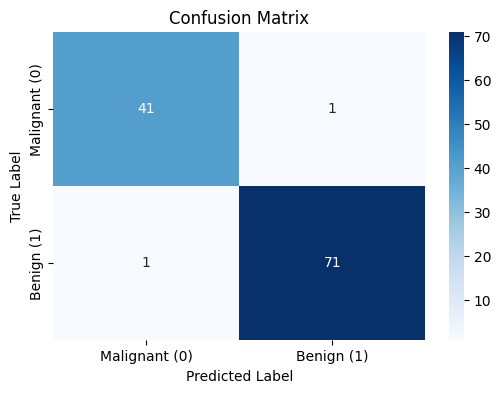

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 1️⃣ Load Dataset (Using Breast Cancer Dataset for Binary Classification)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Binary target (0 = malignant, 1 = benign)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# 7️⃣ Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 8️⃣ Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant (0)', 'Benign (1)'], yticklabels=['Malignant (0)', 'Benign (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score?

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1️⃣ Load Dataset (Using Breast Cancer Dataset for Binary Classification)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Binary target (0 = malignant, 1 = benign)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Compute Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 7️⃣ Print Performance Metrics
print(f"Model Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 8️⃣ Print Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1-Score: 0.9861

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance?

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from collections import Counter

# 1️⃣ Load Imbalanced Dataset (Using Synthetic Data)
from sklearn.datasets import make_classification

# Generate an imbalanced dataset (95% of class 0, 5% of class 1)
X, y = make_classification(n_samples=5000, n_features=10, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Show class distribution
print(f"Class Distribution Before Balancing: {Counter(y)}")

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Important for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model with Class Weights
model = LogisticRegression(class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 7️⃣ Print Model Performance
print("\nModel Performance with Class Weights:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 8️⃣ Print Full Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class Distribution Before Balancing: Counter({0: 4722, 1: 278})

Model Performance with Class Weights:
Accuracy: 0.8380
Precision: 0.2268
Recall: 0.7857
F1-Score: 0.3520

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       944
           1       0.23      0.79      0.35        56

    accuracy                           0.84      1000
   macro avg       0.61      0.81      0.63      1000
weighted avg       0.94      0.84      0.88      1000



14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance?

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1️⃣ Load Titanic Dataset from Online Source
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2️⃣ Select Relevant Features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]  # Keep selected features + target column

# 3️⃣ Handle Missing Values
imputer = SimpleImputer(strategy='median')  # Fill missing values with median
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' with most frequent value

# 4️⃣ Convert Categorical Variables into Numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert Sex to numeric
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encode 'Embarked'

# 5️⃣ Separate Features (X) and Target (y)
X = df.drop(columns=['Survived']).values  # Features
y = df['Survived'].values  # Target

# 6️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 9️⃣ Make Predictions
y_pred = model.predict(X_test)

# 🔟 Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 🔹 Print Performance Metrics
print("\n🚢 Titanic Survival Prediction - Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



🚢 Titanic Survival Prediction - Logistic Regression Performance:
Accuracy:  0.8045
Precision: 0.7931
Recall:    0.6667
F1-Score:  0.7244

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<ipython-input-7-db753063d121>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' with most frequent value


10.  Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scalingM

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Load Titanic Dataset from Online Source
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2️⃣ Select Relevant Features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]  # Keep selected features + target column

# 3️⃣ Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing Fare with median

# 4️⃣ Convert Categorical Variables into Numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert Sex to numeric

# 5️⃣ Separate Features (X) and Target (y)
X = df.drop(columns=['Survived']).values  # Features
y = df['Survived'].values  # Target

# 6️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7️⃣ Train Logistic Regression Model WITHOUT Feature Scaling
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# 8️⃣ Standardize Features (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9️⃣ Train Logistic Regression Model WITH Feature Scaling
model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# 🔟 Print Comparison of Results
print("\n🚢 Titanic Survival Prediction - Logistic Regression Performance:")
print(f"Accuracy WITHOUT Scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy WITH Scaling:    {accuracy_with_scaling:.4f}")



🚢 Titanic Survival Prediction - Logistic Regression Performance:
Accuracy WITHOUT Scaling: 0.8045
Accuracy WITH Scaling:    0.8045


<ipython-input-8-b7282e521582>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age with median
<ipython-input-8-b7282e521582>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score?


🌸 Iris Dataset - Logistic Regression Performance:
Accuracy:  1.0000
ROC-AUC Score: 1.0000


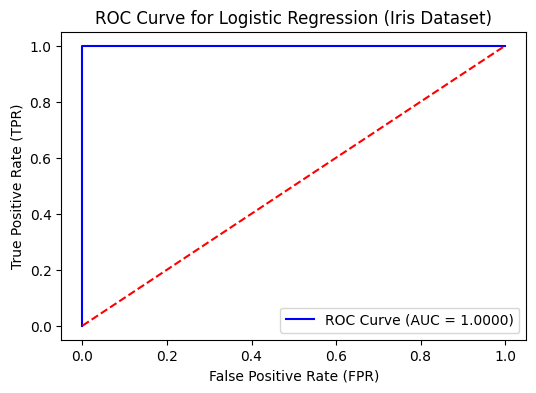

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Convert the Problem to Binary Classification (Class 2 vs. Rest)
y_binary = (y == 2).astype(int)  # Convert to binary (1 if class 2, else 0)

# 3️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# 4️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6️⃣ Make Predictions (Probability Scores for ROC-AUC)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred = model.predict(X_test)  # Get class predictions

# 7️⃣ Compute Model Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# 🔹 Print Results
print("\n🌸 Iris Dataset - Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 🔹 Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Random guess line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Logistic Regression (Iris Dataset)")
plt.legend()
plt.show()


17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy?

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model with Custom Regularization (C=0.5)
model = LogisticRegression(C=0.5, solver='lbfgs', multi_class='multinomial', max_iter=5000)
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Compute Model Accuracy
accuracy = accuracy_score(y_test, y_pred)

# 🔹 Print Results
print("\n🌸 Iris Dataset - Logistic Regression Performance (C=0.5):")
print(f"Model Accuracy: {accuracy:.4f}")



🌸 Iris Dataset - Logistic Regression Performance (C=0.5):
Model Accuracy: 0.9333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


18. Write a Python program to train Logistic Regression and identify important features based on model
coefficients?

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


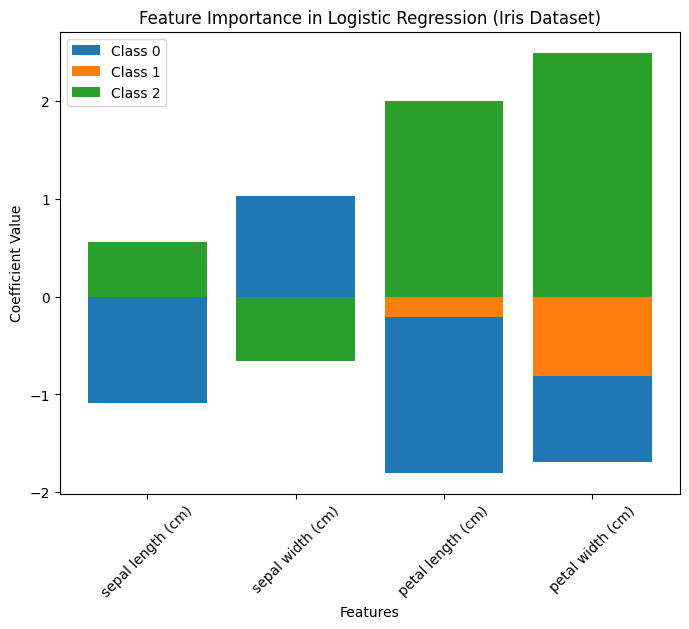


🌸 Feature Importance Based on Model Coefficients:
                    Class 0   Class 1   Class 2
sepal length (cm) -1.088945  0.536337  0.552608
sepal width (cm)   1.024208 -0.360487 -0.663721
petal length (cm) -1.799056 -0.204074  2.003130
petal width (cm)  -1.686228 -0.807957  2.494185


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)
feature_names = iris.feature_names  # Feature names

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial', max_iter=5000)
model.fit(X_train, y_train)

# 5️⃣ Extract Feature Importance (Coefficients)
coefficients = model.coef_  # Shape: (n_classes, n_features)

# 6️⃣ Plot Feature Importance
plt.figure(figsize=(8, 6))
for i in range(coefficients.shape[0]):  # Loop through each class
    plt.bar(feature_names, coefficients[i], label=f'Class {i}')

plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression (Iris Dataset)")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# 🔹 Print Feature Importance for Each Class
feature_importance = pd.DataFrame(coefficients.T, index=feature_names, columns=[f'Class {i}' for i in range(coefficients.shape[0])])
print("\n🌸 Feature Importance Based on Model Coefficients:")
print(feature_importance)


19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score?

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial', max_iter=5000)
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
kappa_score = cohen_kappa_score(y_test, y_pred)

# 🔹 Print Results
print("\n🌸 Iris Dataset - Logistic Regression Performance:")
print(f"Accuracy:        {accuracy:.4f}")
print(f"Cohen’s Kappa Score: {kappa_score:.4f}")



🌸 Iris Dataset - Logistic Regression Performance:
Accuracy:        0.9333
Cohen’s Kappa Score: 0.9000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification?

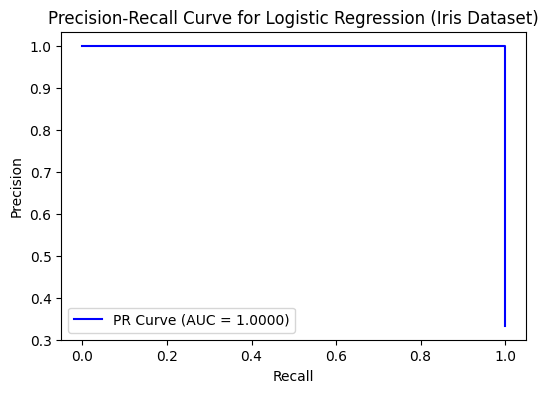


🌸 Iris Dataset - Logistic Regression Performance:
Accuracy:  1.0000
Precision-Recall AUC Score: 1.0000


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, accuracy_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Convert to Binary Classification (Class 2 vs. Rest)
y_binary = (y == 2).astype(int)  # 1 if class 2, else 0

# 3️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# 4️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5️⃣ Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6️⃣ Make Predictions (Probability Scores for Precision-Recall Curve)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
y_pred = model.predict(X_test)

# 7️⃣ Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# 8️⃣ Plot Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='blue', label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Logistic Regression (Iris Dataset)")
plt.legend()
plt.show()

# 🔹 Print PR AUC Score
print("\n🌸 Iris Dataset - Logistic Regression Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")


21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy?

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression with Different Solvers and Compare Accuracy
solvers = {'liblinear': 'ovr', 'saga': 'multinomial', 'lbfgs': 'multinomial'}
accuracy_results = {}

for solver, multi_class in solvers.items():
    model = LogisticRegression(solver=solver, multi_class=multi_class, max_iter=5000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[solver] = accuracy
    print(f"Solver: {solver} → Accuracy: {accuracy:.4f}")

# 🔹 Print Best Solver
best_solver = max(accuracy_results, key=accuracy_results.get)
print(f"\n🚀 Best Solver: {best_solver} with Accuracy: {accuracy_results[best_solver]:.4f}")


Solver: liblinear → Accuracy: 0.8333
Solver: saga → Accuracy: 0.9333
Solver: lbfgs → Accuracy: 0.9333

🚀 Best Solver: saga with Accuracy: 0.9333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC)?

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, matthews_corrcoef

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression(C=1.0, solver='lbfgs', multi_class='multinomial', max_iter=5000)
model.fit(X_train, y_train)

# 5️⃣ Make Predictions
y_pred = model.predict(X_test)

# 6️⃣ Compute Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# 🔹 Print Results
print("\n🌸 Iris Dataset - Logistic Regression Performance:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



🌸 Iris Dataset - Logistic Regression Performance:
Accuracy:  0.9333
Matthews Correlation Coefficient (MCC): 0.9000


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


23.Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling?

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Train Logistic Regression on RAW Data (Without Scaling)
model_raw = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial')
model_raw.fit(X_train_raw, y_train)
y_pred_raw = model_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# 4️⃣ Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# 5️⃣ Train Logistic Regression on STANDARDIZED Data
model_scaled = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='multinomial')
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 🔹 Print Comparison of Results
print("\n🌸 Iris Dataset - Logistic Regression Performance:")
print(f"Accuracy WITHOUT Scaling: {accuracy_raw:.4f}")
print(f"Accuracy WITH Scaling:    {accuracy_scaled:.4f}")



🌸 Iris Dataset - Logistic Regression Performance:
Accuracy WITHOUT Scaling: 0.9667
Accuracy WITH Scaling:    0.9333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation?

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

C=0.001 → Mean CV Accuracy: 0.8333
C=0.01 → Mean CV Accuracy: 0.8833
C=0.1 → Mean CV Accuracy: 0.9250
C=0.5 → Mean CV Accuracy: 0.9583


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

C=1 → Mean CV Accuracy: 0.9583
C=5 → Mean CV Accuracy: 0.9667
C=10 → Mean CV Accuracy: 0.9667
C=50 → Mean CV Accuracy: 0.9667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

C=100 → Mean CV Accuracy: 0.9667

🚀 Best C Value: 5 with Accuracy: 0.9667

📊 Test Accuracy with Best C (5): 0.9667


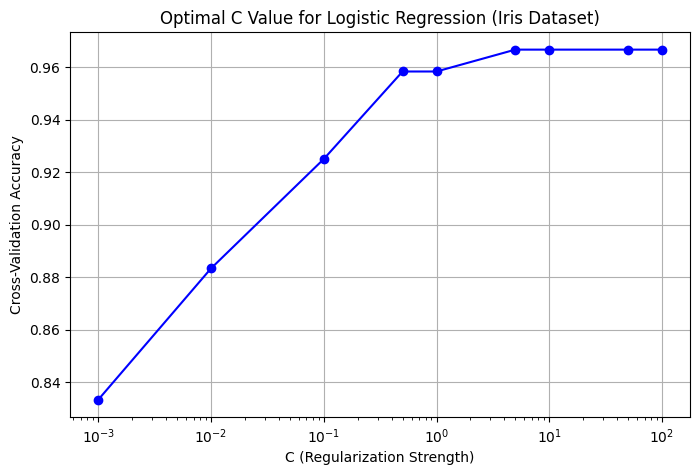

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Define a Range of C Values to Test
C_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
cv_scores = []

# 5️⃣ Perform Cross-Validation for Each C Value
for C in C_values:
    model = LogisticRegression(C=C, solver='lbfgs', multi_class='multinomial', max_iter=5000)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    mean_score = np.mean(scores)
    cv_scores.append(mean_score)
    print(f"C={C} → Mean CV Accuracy: {mean_score:.4f}")

# 6️⃣ Find the Best C Value
best_C = C_values[np.argmax(cv_scores)]
print(f"\n🚀 Best C Value: {best_C} with Accuracy: {max(cv_scores):.4f}")

# 7️⃣ Train Final Model with Best C and Evaluate on Test Set
best_model = LogisticRegression(C=best_C, solver='lbfgs', multi_class='multinomial', max_iter=5000)
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f"\n📊 Test Accuracy with Best C ({best_C}): {test_accuracy:.4f}")

# 8️⃣ Plot C vs. Accuracy
plt.figure(figsize=(8, 5))
plt.plot(C_values, cv_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Optimal C Value for Logistic Regression (Iris Dataset)")
plt.grid()
plt.show()


25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions?

In [19]:
import numpy as np
import pandas as pd
import joblib  # Library for saving and loading models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1️⃣ Load the Iris Dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Multiclass labels (0, 1, 2)

# 2️⃣ Split Data into Training & Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Standardize Features (Recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Train Logistic Regression Model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=5000)
model.fit(X_train_scaled, y_train)

# 5️⃣ Save the Trained Model and Scaler Using joblib
joblib.dump(model, "logistic_regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("\n✅ Model and Scaler Saved Successfully!")

# 6️⃣ Load the Saved Model and Scaler
loaded_model = joblib.load("logistic_regression_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
print("✅ Model and Scaler Loaded Successfully!")

# 7️⃣ Make Predictions Using the Loaded Model
X_test_scaled_loaded = loaded_scaler.transform(X_test)  # Transform test data using loaded scaler
y_pred_loaded = loaded_model.predict(X_test_scaled_loaded)

# 8️⃣ Evaluate Accuracy
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"\n📊 Model Accuracy (After Reloading): {accuracy_loaded:.4f}")



✅ Model and Scaler Saved Successfully!
✅ Model and Scaler Loaded Successfully!

📊 Model Accuracy (After Reloading): 0.9333


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
